In [57]:
import pandas as pd
from sklearn.cluster import KMeans
import json

In [70]:
file_path = 'bandgap_x_sparse_cluster_50_clusters.json'
n_clusters = 50

# Read the data from the CSV file
df_data = pd.read_csv("bandgap_features.csv")

excluded = ["formula", "composition", "formula", "gap expt"]
y = df_data['gap expt'].values
X = df_data.drop(excluded, axis=1)

In [59]:
y.shape

(4604,)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate a random dataset
# np.random.seed(42)
# X = np.random.rand(100, 50)  # 100 samples with 50 features

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)

/Users/jeffreyhusc/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jeffreyhusc/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(4604, 2)


In [61]:
X_tsne = pd.DataFrame(X_tsne, columns = ["X","Y"])
X_tsne = X_tsne.reset_index(drop=True)
print(X_tsne)

              X          Y
0     -4.615550  60.748959
1    -64.337639  19.427244
2     -2.120811  61.244762
3     -2.624620  62.201351
4     22.920565  32.713394
...         ...        ...
4599 -82.073967  -2.753502
4600  39.401924 -55.525936
4601  48.687027 -24.536665
4602 -56.797749 -30.083256
4603  74.163956   2.791002

[4604 rows x 2 columns]


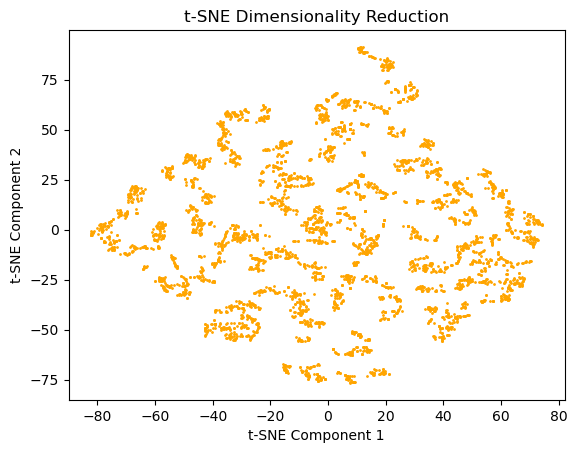

In [62]:
# Plot the reduced-dimensional data
plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], s=1, color="orange")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Dimensionality Reduction')
plt.show()


/var/folders/zb/rbdbr6kx16xd95r_hylx2fm80000gp/T/ipykernel_99470/529003638.py:15: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = kde.gaussian_kde(df.T)


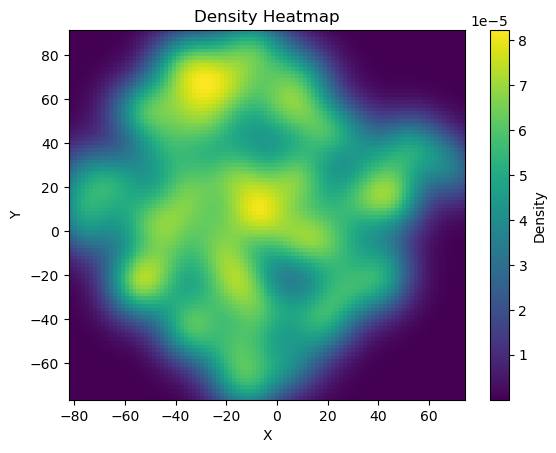

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

# Generate some random data
# np.random.seed(42)
# x = np.random.normal(0, 1, 100)
# y = np.random.normal(0, 1, 100)

# Create DataFrame with the points
df = X_tsne

# Calculate the density using kernel density estimation
kde = kde.gaussian_kde(df.T)

# Define the grid for evaluation
x_grid, y_grid = np.mgrid[df['X'].min():df['X'].max():100j, df['Y'].min():df['Y'].max():100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the density on the grid
density = np.reshape(kde(positions).T, x_grid.shape)

# Plot the density heatmap
plt.imshow(density, origin='lower', aspect='auto', extent=[df['X'].min(), df['X'].max(), df['Y'].min(), df['Y'].max()])
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Heatmap')

# Show the plot
plt.show()


In [64]:
# Evaluate the density at each sample position
densities = kde(X_tsne.T)

density_dict = {}

# Print the density values for each sample position
for i in range(len(X_tsne)):
    density = densities[i]
    #print(f"Density at sample position {i+1}: {density}")
    
    density_dict[i] = density

#print(density_dict)

sorted_density = sorted(density_dict.items(), key=lambda x: x[1])
#print(sorted_density)
top500 = [x[0] for x in sorted_density[:500]]
X_sparse = X.iloc[top500]
print(X_sparse.shape)

(500, 133)


In [65]:
id_map = {}

for i, index in enumerate(top500):
    id_map[i] = top500[i]
    
id_map

{0: 459,
 1: 465,
 2: 505,
 3: 494,
 4: 454,
 5: 515,
 6: 503,
 7: 463,
 8: 468,
 9: 470,
 10: 510,
 11: 4165,
 12: 488,
 13: 4170,
 14: 502,
 15: 493,
 16: 500,
 17: 501,
 18: 484,
 19: 489,
 20: 517,
 21: 504,
 22: 507,
 23: 4409,
 24: 680,
 25: 699,
 26: 678,
 27: 4410,
 28: 4386,
 29: 717,
 30: 4383,
 31: 712,
 32: 708,
 33: 707,
 34: 716,
 35: 723,
 36: 4354,
 37: 4397,
 38: 4387,
 39: 701,
 40: 4390,
 41: 4508,
 42: 4351,
 43: 4352,
 44: 4430,
 45: 4407,
 46: 4498,
 47: 4402,
 48: 4382,
 49: 4363,
 50: 4491,
 51: 4433,
 52: 4385,
 53: 4411,
 54: 4343,
 55: 4389,
 56: 4167,
 57: 4168,
 58: 4151,
 59: 4600,
 60: 4384,
 61: 4184,
 62: 4376,
 63: 4364,
 64: 4154,
 65: 4416,
 66: 4162,
 67: 4372,
 68: 4598,
 69: 4388,
 70: 4482,
 71: 951,
 72: 1029,
 73: 4185,
 74: 1048,
 75: 1019,
 76: 941,
 77: 4594,
 78: 4148,
 79: 968,
 80: 397,
 81: 4429,
 82: 1337,
 83: 939,
 84: 4593,
 85: 1053,
 86: 4516,
 87: 1009,
 88: 1335,
 89: 1011,
 90: 4563,
 91: 4182,
 92: 79,
 93: 4029,
 94: 4584,
 95

In [66]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, max_iter=500, random_state=222)
kmeans.fit(X_sparse)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Print cluster labels and centers
#print("Cluster Labels:", labels)
#print("Cluster Centers:", centers)

# Create a dictionary to store the cluster assignments
cluster = {}
#print(labels)
for i, cluster_id in enumerate(labels):
    if cluster_id in cluster:
        #cluster[int(cluster_id)].append(i)
        continue
    else:
        cluster[int(cluster_id)] = [id_map[i]]







In [67]:
print(cluster)

{46: [459], 38: [4165], 23: [484], 11: [4390], 8: [4508], 33: [4351], 27: [4430], 30: [4151], 16: [951], 40: [4594], 28: [397], 37: [4429], 44: [1337], 1: [1053], 41: [4516], 39: [79], 36: [4574], 48: [189], 42: [86], 29: [1732], 0: [4470], 25: [499], 15: [342], 45: [4492], 13: [4401], 10: [1737], 35: [889], 12: [4528], 32: [4485], 9: [1487], 14: [4507], 22: [322], 6: [4589], 2: [391], 7: [1063], 31: [123], 24: [3720], 26: [376], 4: [574], 5: [4572], 21: [4480], 34: [4467], 47: [4291], 17: [1650], 20: [3477], 18: [540], 3: [4566], 19: [3674], 43: [2559], 49: [1648]}


In [68]:
selected_samples = []

# Print the size of each cluster
for key in sorted(cluster):
    #print(key, (cluster[key]))
    anchor_index = cluster[key][0]

    anchor_feature = X.iloc[anchor_index]
    #print(anchor_feature)
    distance_dict = {}
    for row_index in range(X.shape[0]):
        f = X.iloc[row_index]
        euclidean_distance = np.linalg.norm(anchor_feature - f)
        #print(euclidean_distance)
        
        if row_index == anchor_index:
            continue
        else:
            distance_dict[row_index] = euclidean_distance
    distance_dict = sorted(distance_dict.items(), key=lambda x: x[1])
    #print(distance_dict)
    n_added = 0
    for ck in distance_dict:
        if ck[0] not in selected_samples and n_added < 10:
            cluster[key].append(ck[0])
            selected_samples.append(ck[0])
            n_added += 1
    print(cluster[key])
    #break
for key in cluster:
    print(key, cluster[key])

[4470, 4465, 4464, 4476, 4461, 4463, 4424, 4496, 4446, 4467, 4472]
[1053, 1011, 1012, 1025, 921, 925, 1024, 926, 1023, 1027, 924]
[391, 313, 418, 610, 412, 284, 298, 300, 175, 890, 550]
[4566, 3781, 3764, 3757, 3765, 3864, 4359, 4100, 4087, 3763, 3771]
[574, 586, 563, 759, 753, 546, 369, 807, 321, 779, 326]
[4572, 4585, 4595, 4423, 4242, 4534, 4530, 4536, 4592, 4197, 4131]
[4589, 4603, 3980, 4265, 4591, 4291, 4582, 4271, 3908, 4163, 4581]
[1063, 770, 1304, 769, 1222, 827, 555, 1072, 1521, 620, 615]
[4508, 4491, 4498, 4433, 4384, 4411, 4402, 4388, 4376, 4407, 4351]
[1487, 1481, 1583, 1299, 1547, 1577, 1143, 1129, 1121, 1109, 1332]
[1737, 1710, 1691, 1740, 1254, 1714, 1723, 1696, 1690, 1390, 1735]
[4390, 4387, 4386, 4382, 4389, 4416, 4410, 4385, 4397, 4343, 4409]
[4528, 4529, 4527, 4526, 4599, 4033, 4523, 4485, 4255, 4310, 4090]
[4401, 4380, 4378, 4326, 4564, 4584, 4105, 4573, 4234, 4549, 4246]
[4507, 4479, 4490, 4506, 4503, 4396, 4497, 4478, 4346, 4505, 4413]
[342, 404, 293, 280, 231, 2

In [71]:
# Example: Print formulas in cluster 0
for index in cluster[0]:
    print(df_data.iloc[index]["formula"])
    
# Save the dictionary to a file in JSON format
with open(file_path, 'w') as file:
    json.dump(cluster, file)

Zn0.99Ga0.01Sb0.01Te0.99
Zn0.94Hg0.06Te1
Zn0.92Hg0.08Te1
Zn0.9Hg0.1Te1
Zn0.86Hg0.14Te1
Zn0.8Hg0.2Te1
YbSnTe2
Zn6S5Cl2
Zn0.2Hg0.8Te1
Zn0.99Ga0.01As0.01Se0.99
Zn0.9Ga0.1As0.1Se0.9
